<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-3----brightness-temperatures" data-toc-modified-id="Assignment-3----brightness-temperatures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 3 -- brightness temperatures</a></span></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 2</a></span></li></ul></div>

# Assignment 3 -- brightness temperatures

Upload this notebook to canvas by 10am Monday Sept. 24

# Problem 1

In the cell below define a function that inverts the radiance (in MKS units) for the
brightness temperature in Kelvins.  Use the same format as the planck_function notebook,
and use the %%file magic to output your function to a file called planck_invert.py

i.e. the top of the cell should look like:

```python
%%file planck_invert.py
def radiance_invert(wavelengths, Lstar):
   etc.
```

In [1]:
%%file radiance.py
import numpy as np
#
# get Stull's c_1 and c_2 from fundamental constants
#
# c=2.99792458e+08  #m/s -- speed of light in vacuum
# h=6.62606876e-34  #J s  -- Planck's constant
# k=1.3806503e-23  # J/K  -- Boltzman's constant

c, h, k = 299792458.0, 6.62607004e-34, 1.38064852e-23
c1 = 2. * h * c**2.
c2 = h * c / k
sigma = 2. * np.pi**5. * k**4. / (15 * h**3. * c**2.)

def calc_radiance(wavel, Temp):
    """
    Calculate the blackbody radiance
    
    Parameters
    ----------

      wavel: float or array
           wavelength (meters)

      Temp: float
           temperature (K)

    Returns
    -------

    Llambda:  float or arr
           monochromatic radiance (W/m^2/m/sr)
    """
    Llambda_val = c1 / (wavel**5. * (np.exp(c2 / (wavel * Temp)) - 1))
    return Llambda_val

def planck_invert(wavel, Lstar):
    """
    Calculate the brightness temperature
    
    Parameters
    ----------

      wavel: float
           wavelength (meters)

      Lstar: float or array
           Blackbody radiance (W/m^2/m/sr)
    Returns
    -------

    Tbright:  float or arr
           brightness temperature (K)
    """
    Tbright = c2 / (wavel * np.log(c1 / (wavel**5. * Lstar) + 1.))
    return Tbright


Overwriting radiance.py


# Problem 2

In the next cell import your planck_invert function and use it to turn the calibrated
radiances you've written out in your modis_data_analysis notebook into brightness temperatures
in Kelvins.  Plot the temperatures as an image, using a colorbar as in Modis level1b notebook

In [2]:
from radiance import calc_radiance, planck_invert
from pyhdf.SD import SD, SDC
file_name="ch30_out.hdf"
the_file = SD(file_name, SDC.READ)
ch30_data = the_file.select('ch30').get() # select sds

In [3]:
wavel= 9.73e-6  #wavelength in meters
ch30_radiances=ch30_data*1.e6;  #convert radiance to MKS
ch30_Tbright = planck_invert(wavel,ch30_radiances)

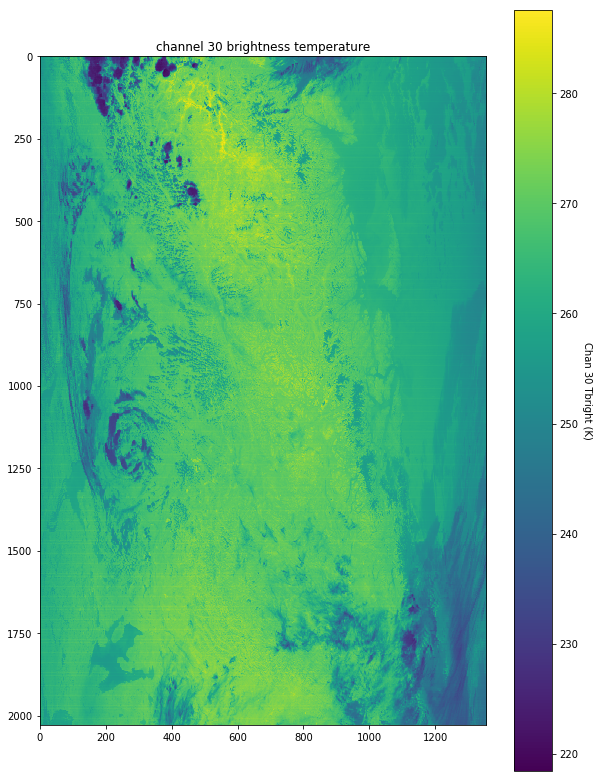

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_Tbright)
cax=fig.colorbar(CS)
ax.set_title('channel 30 brightness temperature')
out=cax.ax.set_ylabel('Chan 30 Tbright (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)
